<a href="https://colab.research.google.com/github/abrishwon21/ML_in_Python/blob/master/DataAnalysis_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
path911="/content/sample_data/911.csv"
df_911=pd.read_csv(path911)
df_911.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1.0


In [ ]:
#1) how many different calls are there?
noOfCalltpes=df_911['title'].nunique()
noOfCalltpes

91

In [ ]:
#2 extract the date and time regarding to the calls

dtNTime=df_911['timeStamp']
dtNTime.value_counts()

2015-12-12 05:22:51    5
2016-02-01 10:24:43    5
2015-12-14 21:37:01    5
2015-12-23 09:32:33    5
2015-12-17 20:39:02    4
                      ..
2016-01-01 15:15:03    1
2016-01-19 10:27:19    1
2016-01-17 12:20:14    1
2016-02-18 23:38:12    1
2015-12-23 20:13:06    1
Name: timeStamp, Length: 27349, dtype: int64

In [ ]:
grupbytitle=df_911.groupby('title')
givcall=input("please enter the call title ")
grupbytitle.get_group(givcall).loc[:,['title','timeStamp']]


please enter the call title EMS: BACK PAINS/INJURY


,title,timeStamp
0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52
250,EMS: BACK PAINS/INJURY,2015-12-11 12:31:17
361,EMS: BACK PAINS/INJURY,2015-12-11 16:47:33
420,EMS: BACK PAINS/INJURY,2015-12-11 18:31:54
923,EMS: BACK PAINS/INJURY,2015-12-13 02:33:58
1043,EMS: BACK PAINS/INJURY,2015-12-13 12:56:06
1044,EMS: BACK PAINS/INJURY,2015-12-13 13:00:29
1321,EMS: BACK PAINS/INJURY,2015-12-14 08:53:00
1382,EMS: BACK PAINS/INJURY,2015-12-14 11:55:42
1431,EMS: BACK PAINS/INJURY,2015-12-14 13:36:58


In [ ]:
#3) at which time can i expect 
df_911["Reason"] = df_911["title"].apply(lambda title: title.split()[0])

df_911["timeStamp"] = pd.to_datetime(df_911["timeStamp"])
df_911["Year"] = pd.DatetimeIndex(df_911['timeStamp']).year
df_911["Month"] = pd.DatetimeIndex(df_911["timeStamp"]).month
df_911["Time"] = pd.DatetimeIndex(df_911["timeStamp"]).time
df_911["DayOfWeek"] = pd.DatetimeIndex(df_911["timeStamp"]).dayofweek
df_911["Date"] = pd.DatetimeIndex(df_911["timeStamp"]).date
df_911["DayOfWeek"] = df_911["DayOfWeek"].map({0:'Mon',
                                      1:'Tue',
                                      2:"Wed",
                                      3:"Thur",
                                      4:"Fri",
                                      5:"Sat",
                                      "6":"Sun"})
df2=df_911.loc[:,:]
df2.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Month,Time,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,2015,12,17:10:52,Thur,2015-12-10


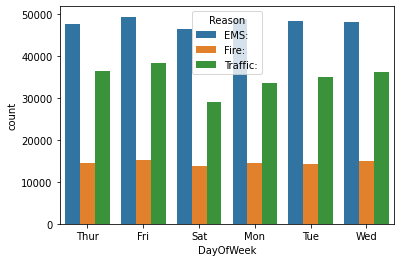

In [ ]:
#4 visualization

sb.countplot(x="DayOfWeek",
             data=df2,
             hue="Reason")


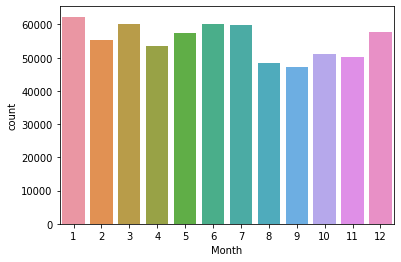

In [ ]:

sb.countplot(x="Month",
             data=df2)

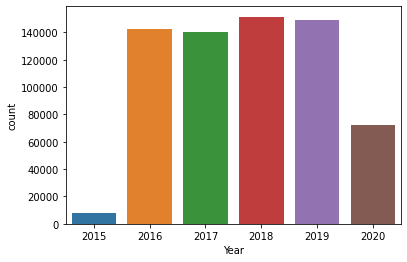

In [ ]:

sb.countplot(x="Year",
             data=df2)

In [5]:


#the second question is on employee_performance.csv

emp=pd.read_csv("/content/sample_data/Employee_Performance.csv")
emp.head(2)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3


In [44]:
#1)department wise performance
grupEmpDep=emp.groupby('EmpDepartment')
for i,g in grupEmpDep['PerformanceRating']:
  print(i)
  print(g.head(5))


Data Science
89     3
107    3
108    3
120    3
942    3
Name: PerformanceRating, dtype: int64
Development
5     4
7     3
8     3
9     3
10    3
Name: PerformanceRating, dtype: int64
Finance
482    2
484    3
485    2
486    3
487    3
Name: PerformanceRating, dtype: int64
Human Resources
3     3
16    3
58    3
81    3
85    3
Name: PerformanceRating, dtype: int64
Research & Development
156    3
157    3
158    3
159    3
160    3
Name: PerformanceRating, dtype: int64
Sales
0    3
1    3
2    4
4    3
6    3
Name: PerformanceRating, dtype: int64


In [32]:
#2. top important features affecting employee performance
empCo=emp.corr()
empCo.iloc[:,:]

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


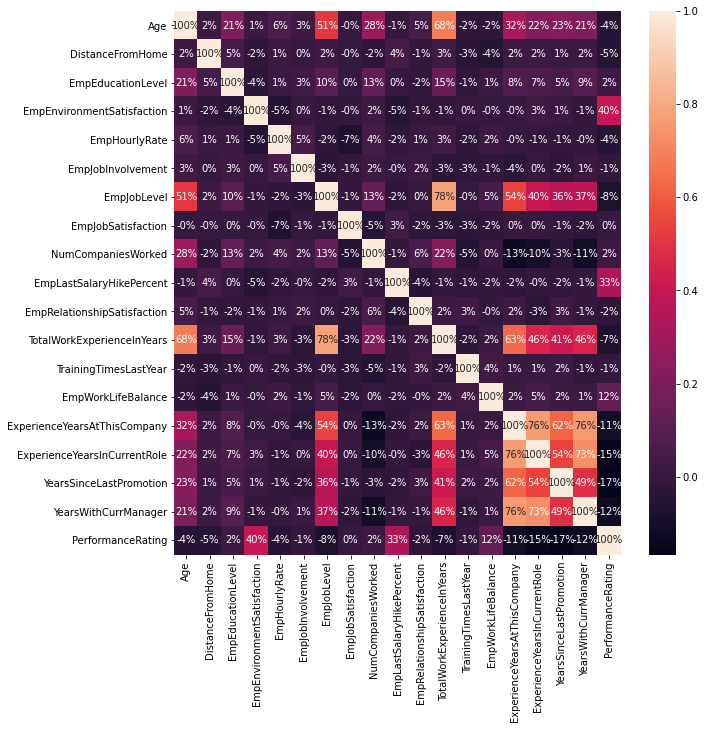

In [ ]:
#let's visualize using heatmap
plt.figure(figsize=(10,10))
sb.heatmap(emp.corr(),annot=True,fmt=".0%")

In [45]:
#3.how many males and females department wise?
grupEmpDep['Gender'].value_counts()

EmpDepartment           Gender
Data Science            Male       12
                        Female      8
Development             Male      219
                        Female    142
Finance                 Male       27
                        Female     22
Human Resources         Male       37
                        Female     17
Research & Development  Male      214
                        Female    129
Sales                   Male      216
                        Female    157
Name: Gender, dtype: int64

In [46]:
#4.how many single, married,and divorce
grupEmpDep['MaritalStatus'].value_counts()

EmpDepartment           MaritalStatus
Data Science            Married           10
                        Divorced           7
                        Single             3
Development             Married          154
                        Single           116
                        Divorced          91
Finance                 Married           25
                        Divorced          14
                        Single            10
Human Resources         Married           28
                        Divorced          13
                        Single            13
Research & Development  Married          156
                        Single           113
                        Divorced          74
Sales                   Married          175
                        Single           129
                        Divorced          69
Name: MaritalStatus, dtype: int64

In [47]:
#5. how many frequently travellers,non traviler,rapid
grupEmpDep['BusinessTravelFrequency'].value_counts()

EmpDepartment           BusinessTravelFrequency
Data Science            Travel_Rarely               17
                        Travel_Frequently            3
Development             Travel_Rarely              262
                        Travel_Frequently           64
                        Non-Travel                  35
Finance                 Travel_Rarely               37
                        Travel_Frequently            8
                        Non-Travel                   4
Human Resources         Travel_Rarely               39
                        Travel_Frequently           10
                        Non-Travel                   5
Research & Development  Travel_Rarely              224
                        Travel_Frequently           72
                        Non-Travel                  47
Sales                   Travel_Rarely              267
                        Travel_Frequently           65
                        Non-Travel                  41
Name: BusinessTra